In [250]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##### Основная задача: проанализировать выборку страховых событий (ДТП с двумя участниками) на возможное мошенничество.  Выделить тех клиентов, относительно которых существует подозрение на мошеннические действия; обосновать подозрение.

In [38]:
data = pd.read_csv('/home/alex/Загрузки/Ren/data.csv', sep=';',encoding='cp1251', index_col=u'№ страхового события')

In [44]:
data = data[ [u'Участник 1',  u'Участник 2']]

In [45]:
data.head()

,Участник 1,Участник 2
№ страхового события,,
1,Беляев Владислав Аркадьевич,Ефимов Малик Константинович
2,Давыдова Ануш Оскаровна,Никифорова Божена Львовна
3,Белов Сергей Михайлович,Третьяков Никита Харитонович
4,Власов Артём Михайлович,Аксенова Вероника Кузьминична
5,Яковлев Алан Макарович,Сысоев Елисей Тимофеевич


##### Сформируем словарь всех участников ДТП, значениями в котором будут количество страховых случаев в которых этот участник оказался.

In [52]:
unique_people = set(data[u'Участник 1'].unique()).union(  set(data[u'Участник 2'].unique()) )

In [169]:
s1 = data[u'Участник 2'].value_counts() 

In [168]:

s2 = data[u'Участник 1'].value_counts()

In [175]:
new = s1.append(s2)

In [198]:
count_dict = new.groupby(group_keys=unique_people,level=0).sum().to_dict()

##### Для построения графа отберем только те страховые случаи, в которых учавствовали клиенты с более чем одним страховым случаем.

In [199]:
list_of_relations = []
for i in data.iterrows():
    if count_dict[i[1][0]]>1 or count_dict[i[1][1]]>1:
        list_of_relations.append( tuple([ i[1][0], i[1][1],i[0]]) )
    

In [200]:
set_of_repeats = (set(data[u'Участник 1'].unique()) & set(data[u'Участник 1'].unique()))

In [30]:
for i in (set(data.iloc[:,1].unique()) & set(data.iloc[:,2].unique())):
    print i

Мамонтов Мстислав Георгиевич
Комин Сергей Николаевич
Рогачев Антон Владимирович
Воробьев Иван Александрович
Котова Виктория Архиповна
Павлова Мария Геннадиевна
Дорофеева Гулия Николаевна
Коробов Вадим Александрович


### Построим и визуализируем граф

Веса ребер графа, это номера стаховых случаев.

In [204]:
Graph_Ostap_B=nx.Graph()

In [205]:
Graph_Ostap_B.add_weighted_edges_from(list_of_relations)

In [216]:
G = Graph_Ostap_B

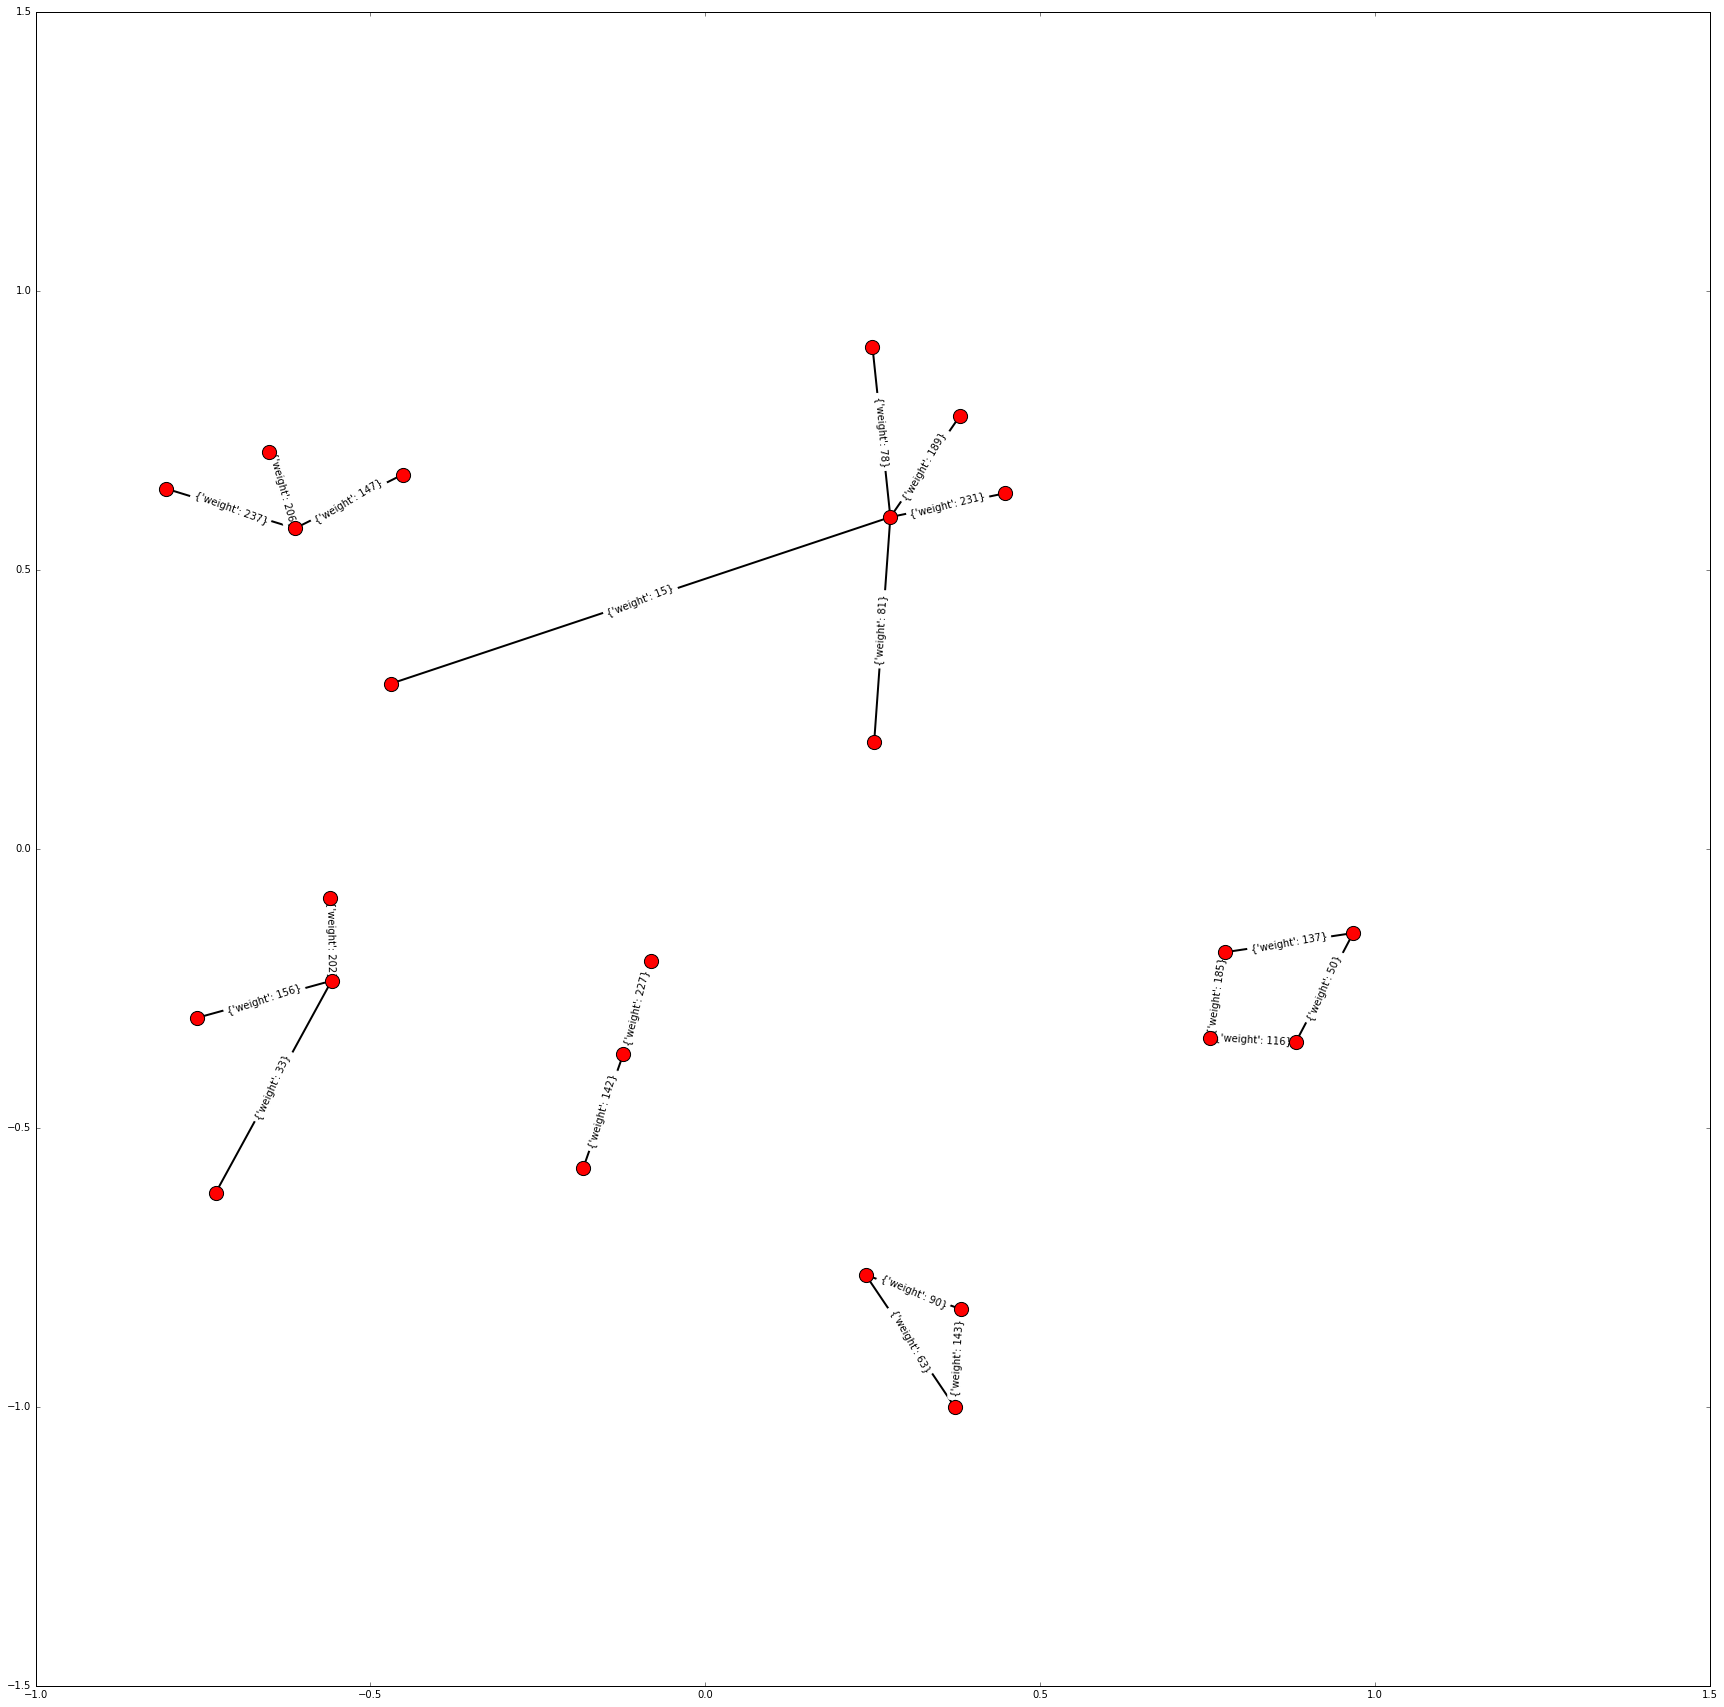

In [286]:
plt.figure(figsize=(30,30))
pos=nx.spring_layout(G, k=2) # positions for all nodes

nx.draw_networkx_edge_labels(G,pos,font_size=10)
# nodes
nx.draw_networkx_nodes(G,pos,node_size=200,)

# edges
nx.draw_networkx_edges(G,pos,width=2)

## Двойной щелчек мыши по картинке для увеличения.

Незнаю, что из себя представляют структуры типа звезда, вероятно просто массовые дтп. 


Кольцевые структуры я интерпретирую таким образом:

Рассмотрим треугольную структуру с вершинами 1,2,3.
Машины 1 и 3 сталкиваются и регистрируют дтп.
Машины 2 и 3 сталикиваются и регистрируют дтп.
После регистрации уже битые машины 1 и 2 перемещаются в другу часть города,
где имитируют новое дтп.
Машины 1 и 2 получают двойную сумму страховки.

Рассмотрим квадратную структуру с вершинами 1,2,3,4:
Машины 1 и 2 сталкиваются, регистрируют дтп
Машины 3 и 4 сталкиваются, регистрируют дтп 
Теперь пары меняются партнерами: 
1 и 3 
2 и 4 
Все учтастники получают двойную сумму страховки.